In [1]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, Dataset, DataLoader
from torch.optim import SGD, Adam
device = 'cuda' if torch.cuda.is_available() else 'cpu'
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X_train = torch.tensor([[[[1,2,3,4],[2,3,4,5], \
                          [5,6,7,8],[1,3,4,5]]], \
                [[[-1,2,3,-4],[2,-3,4,5], \
            [-5,6,-7,8],[-1,-3,-4,-5]]]]).to(device).float()
X_train /= 8
y_train = torch.tensor([0,1]).to(device).float()

In [3]:
def get_model():
    model = nn.Sequential(
                nn.Conv2d(1, 1, kernel_size=3),
                nn.MaxPool2d(2),
                nn.ReLU(),
                nn.Flatten(),
                nn.Linear(1, 1),
                nn.Sigmoid(),
            ).to(device)
    loss_fn = nn.BCELoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

### Note that in the preceding model, we are specifying that there is 1 channel in the input and that we are extracting 1 channel from the output post convolution (that is, we have 1 filter with a size of 3 x 3) using the nn.Conv2d method. After this, we perform max pooling using nn.MaxPool2d and ReLU activation (using nn.Relu()) prior to flattening and connecting to the final layer, which has one output per data point.

In [4]:
def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction.squeeze(0), y)
    batch_loss.backward()
    opt.step()
    opt.zero_grad()
    return batch_loss.item()

In [6]:
trn_dl = DataLoader(TensorDataset(X_train, y_train))
model, loss_fn, optimizer = get_model()

In [7]:
for epoch in range(2000):
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
     

In [8]:
model(X_train[:1])

tensor([[0.2004]], grad_fn=<SigmoidBackward0>)

In [9]:
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
device = "cuda" if torch.cuda.is_available() else "cpu"
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data_folder = '~/data/FMNIST' # This can be any directory you 
# want to download FMNIST to
fmnist = datasets.FashionMNIST(data_folder, download=True, \
                                        train=True)
tr_images = fmnist.data
tr_targets = fmnist.targets

In [10]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()/255
        x = x.view(-1,1,28,28)
        self.x, self.y = x, y 
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix] 
        return x.to(device), y.to(device)
    def __len__(self): 
        return len(self.x)

### The preceding line of code in bold is where we are reshaping each input image (differently to what we did in the previous chapter) since we are providing data to a CNN that expects each input to have a shape of batch size x channels x height x width.

In [11]:
from torch.optim import SGD, Adam
def get_model():
    model = nn.Sequential(
                nn.Conv2d(1, 64, kernel_size=3),
                nn.MaxPool2d(2),
                nn.ReLU(),
                nn.Conv2d(64, 128, kernel_size=3),
                nn.MaxPool2d(2),
                nn.ReLU(),
                nn.Flatten(),
                nn.Linear(3200, 256),
                nn.ReLU(),
                nn.Linear(256, 10)
            ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

In [12]:
model, loss_fn, optimizer = get_model()

## To solidify our understanding of CNNs, let's understand the reason why the number of parameters have been set the way they have in the preceding output:

- Layer 1: Given that there are 64 filters with a kernel size of 3, we have 64 x 3 x 3 weights and 64 x 1 biases, resulting in a total of 640 parameters.
- Layer 4: Given that there are 128 filters with a kernel size of 3, we have 128 x 64 x3 x 3 weights and 128 x 1 biases, resulting in a total of 73,856 parameters.
- Layer 8: Given that a layer with 3,200 nodes is getting connected to another layer with 256 nodes, we have a total of 3,200 x 256 weights + 256 biases, resulting in a total of 819,456 parameters.
- Layer 10: Given that a layer with 256 nodes is getting connected to a layer with 10 nodes, we have a total of 256 x 10 weights and 10 biases, resulting in a total of 2,570 parameters.

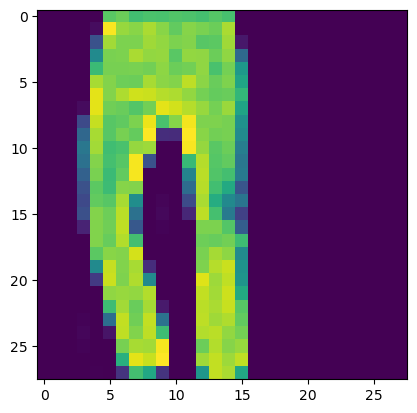

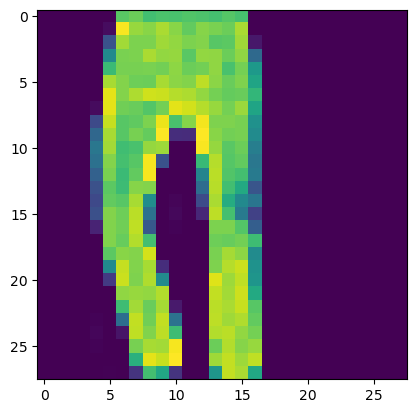

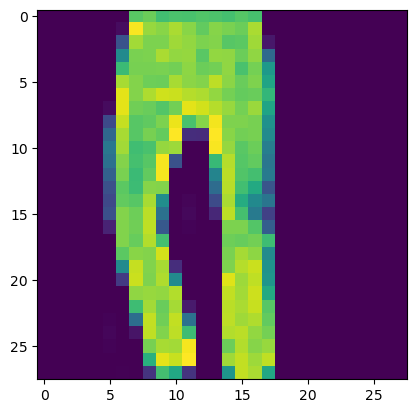

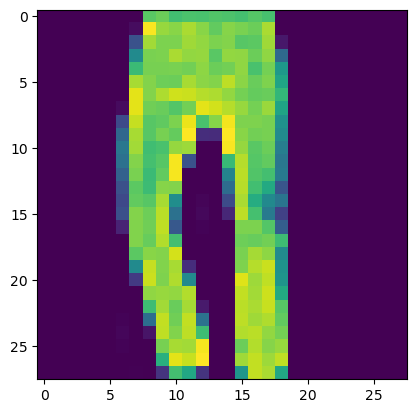

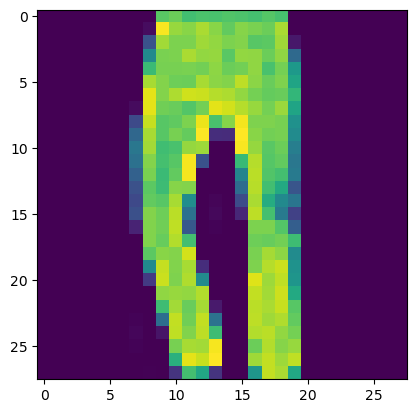

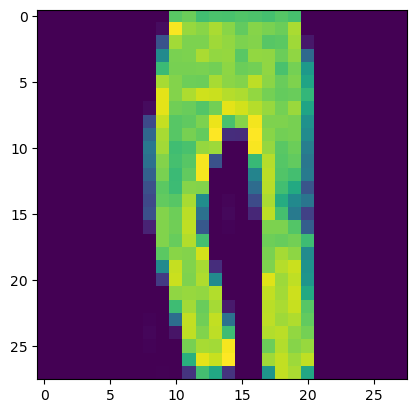

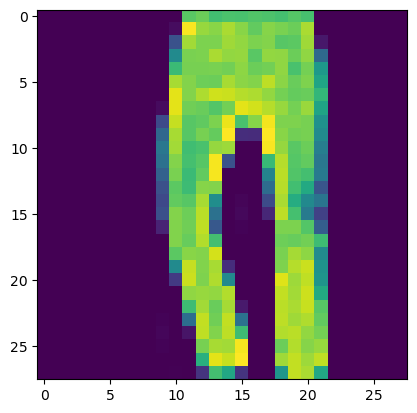

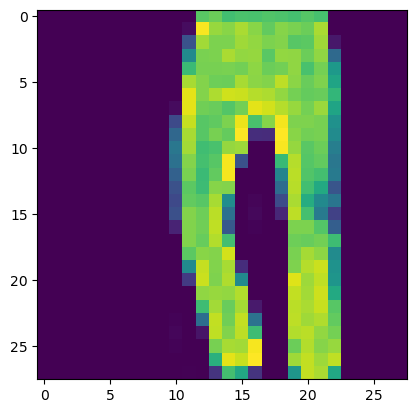

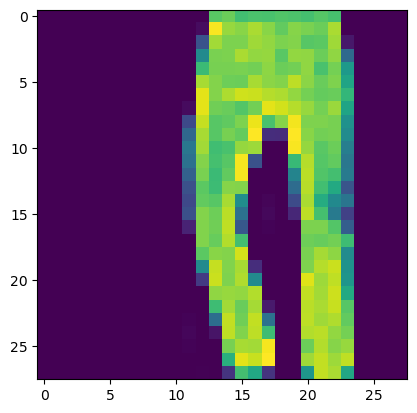

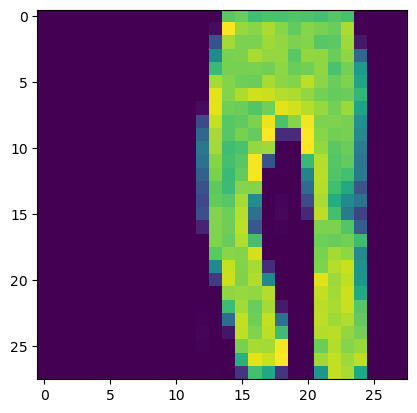

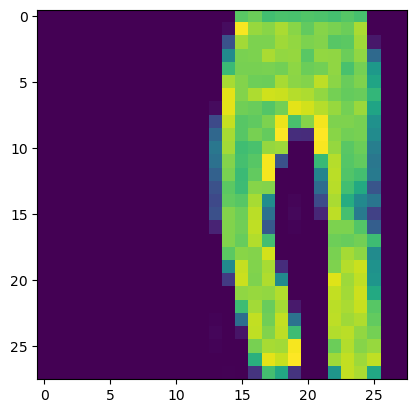

In [13]:
preds = []
ix = 24300
for px in range(-5,6):
    img = tr_images[ix]/255.
    img = img.view(28, 28)
    img2 = np.roll(img, px, axis=1)
    plt.imshow(img2)
    plt.show()
    img3 = torch.Tensor(img2).view(-1,1,28,28).to(device)
    np_output = model(img3).cpu().detach().numpy()
    preds.append(np.exp(np_output)/np.sum(np.exp(np_output)))

<AxesSubplot:title={'center':'Probability of each class for various translations'}>

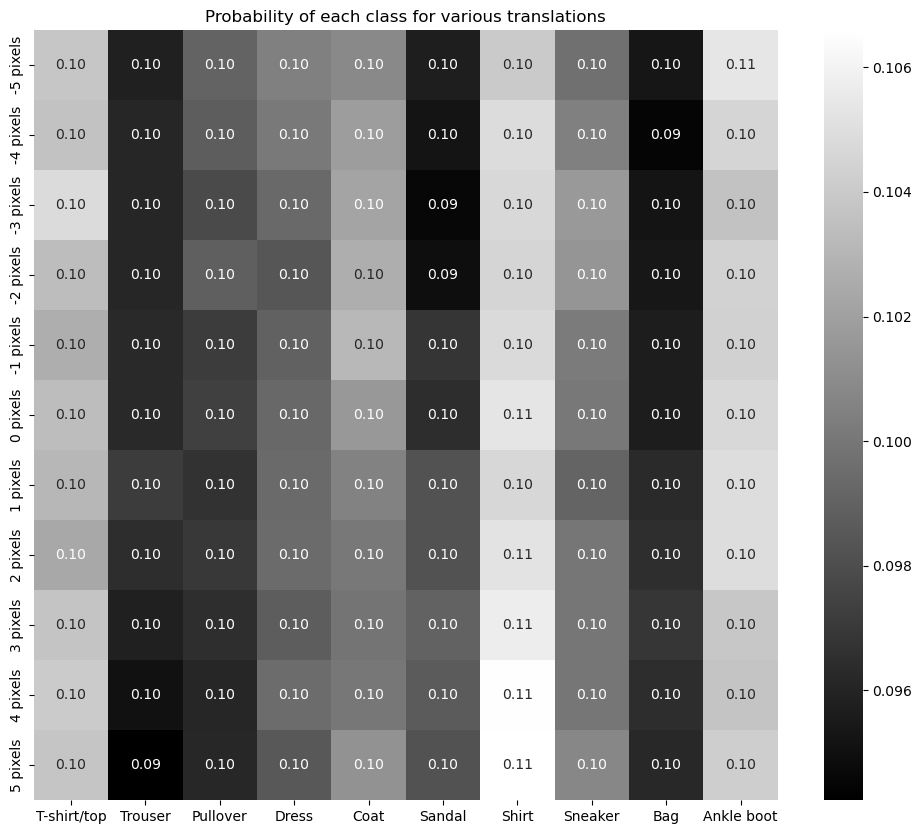

In [14]:
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(12,10))
plt.title('Probability of each class for \
various translations')
sns.heatmap(np.array(preds).reshape(11,10), annot=True, \
            ax=ax, fmt='.2f', xticklabels=fmnist.classes, \
            yticklabels=[str(i)+str(' pixels') \
                         for i in range(-5,6)], cmap='gray')

In [16]:
from torchvision import datasets
import torch
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'
data_folder = '~/data/FMNIST' # This can be any directory 
# you want to download FMNIST to
fmnist = datasets.FashionMNIST(data_folder, download=True, \
                                        train=True)
tr_images = fmnist.data
tr_targets = fmnist.targets
val_fmnist=datasets.FashionMNIST(data_folder, download=True, \
                                        train=False)
val_images = val_fmnist.data
val_targets = val_fmnist.targets

In [18]:
from imgaug import augmenters as iaa
aug = iaa.Sequential([
              iaa.Affine(translate_px={'x':(-10,10)}, 
                                        mode='constant'),
            ])

In [19]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y, aug=None):
        self.x, self.y = x, y
        self.aug = aug
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]
        return x, y
    def __len__(self): return len(self.x)
    def collate_fn(self, batch):
        'logic to modify a batch of images'
        ims, classes = list(zip(*batch))
        # transform a batch of images at once
        if self.aug: ims=self.aug.augment_images(images=ims) 
        ims = torch.tensor(ims)[:,None,:,:].to(device)/255.
        classes = torch.tensor(classes).to(device)
        return ims, classes

In [20]:
from torch.optim import SGD, Adam
def get_model():
    model = nn.Sequential(
                nn.Conv2d(1, 64, kernel_size=3),
                nn.MaxPool2d(2),
                nn.ReLU(),
                nn.Conv2d(64, 128, kernel_size=3),
                nn.MaxPool2d(2),
                nn.ReLU(),
                nn.Flatten(),
                nn.Linear(3200, 256),
                nn.ReLU(),
                nn.Linear(256, 10)
            ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

In [21]:
def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

In [22]:
def get_data(): 
    train = FMNISTDataset(tr_images, tr_targets, aug=aug)
    'notice the collate_fn argument'
    trn_dl = DataLoader(train, batch_size=64, \
                collate_fn=train.collate_fn, shuffle=True)
    val = FMNISTDataset(val_images, val_targets) 
    val_dl = DataLoader(val, batch_size=len(val_images), 
                collate_fn=val.collate_fn, shuffle=True)
    return trn_dl, val_dl

In [23]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [27]:
import torchvision
import torch.nn as nn
import torch
import torch.nn.functional as F
from torchvision import transforms,models,datasets
from PIL import Image
from torch import optim
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import cv2, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob

In [31]:
training_path = "/Users/maukanmir/Downloads/Archive/training_set/training_set"
test_path = "/Users/maukanmir/Downloads/Archive/test_set/test_set"

In [29]:

from torch.utils.data import DataLoader, Dataset
class cats_dogs(Dataset):
  def __init__(self, folder):
    cats = glob(folder+'/cats/*.jpg')
    dogs = glob(folder+'/dogs/*.jpg')
    self.fpaths = cats + dogs
    from random import shuffle, seed; seed(10); shuffle(self.fpaths)
    self.targets = [fpath.split('/')[-1].startswith('dog') for fpath in self.fpaths] # dog=1 & cat=0
  def __len__(self): return len(self.fpaths)
  def __getitem__(self, ix):
    f = self.fpaths[ix]
    target = self.targets[ix]
    im = (cv2.imread(f)[:,:,::-1])
    im = cv2.resize(im, (224,224))
    return torch.tensor(im/255).permute(2,0,1).to(device).float(), torch.tensor([target]).float().to(device)

In [32]:
data = cats_dogs(training_path)
im, label = data[200]

In [33]:
len(data)

8005

tensor([1.])


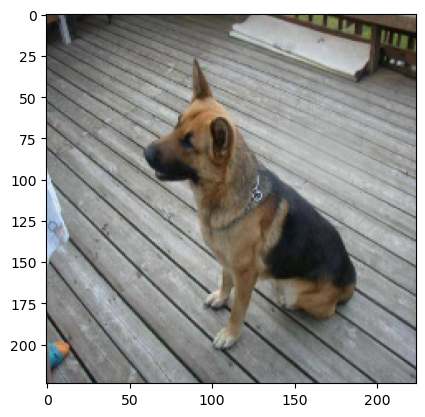

In [34]:

plt.imshow(im.permute(1,2,0).cpu())
print(label)

In [35]:

def conv_layer(ni,no,kernel_size,stride=1):
    return nn.Sequential(
    nn.Conv2d(ni, no, kernel_size, stride),
    nn.ReLU(),
    nn.BatchNorm2d(no),
    nn.MaxPool2d(2)
    )
def get_model():
    model = nn.Sequential(
    conv_layer(3, 64, 3),
    conv_layer(64, 512, 3),
    conv_layer(512, 512, 3),
    conv_layer(512, 512, 3),
    conv_layer(512, 512, 3),
    conv_layer(512, 512, 3),
    nn.Flatten(),
    nn.Linear(512, 1),
    nn.Sigmoid(),
    ).to(device)
    loss_fn = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr= 1e-3)
    return model, loss_fn, optimizer

model, loss_fn, optimizer = get_model()


def train_batch(x, y, model, opt, loss_fn):
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

@torch.no_grad()
def accuracy(x, y, model):
    prediction = model(x)
    is_correct = (prediction > 0.5) == y
    return is_correct.cpu().numpy().tolist()


def get_data():     
    train = cats_dogs(training_path)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True, drop_last = True)
    val = cats_dogs(test_path)
    val_dl = DataLoader(val, batch_size=32, shuffle=True, drop_last = True)
    return trn_dl, val_dl


@torch.no_grad()
def val_loss(x, y, model):
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()


trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [36]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):
    
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    val_epoch_accuracies = []
    for ix, batch in enumerate(iter(trn_dl)):
        #print(ix)
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss)        
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)

    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        val_epoch_accuracies.extend(val_is_correct)
        #validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_epoch_accuracies)

    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    #val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0


In [ ]:

epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with 4K data points used for training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.ylim(0.8,1)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()